In [297]:
import numpy as np 
import cv2 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
from PIL import Image
from __future__ import print_function
import argparse
from IPython.display import Image
from IPython.display import display

file_path = "C:/Users/aya-k/OneDrive/Bureau/VMI_M2/Projet_image/Visucule_Segmentation_with_ControurRegularisation"
image5_Path ="5_Vesicule.jpg"
image6_Path ="6_Vesicule.jpg"
image7_Path ="7_Vesicule.jpg"

points5_file="5_VesiculePoints.csv"
points6_file="6_VesiculePoints.csv"
points7_file="7_VesiculePoints.csv"

CenterP5_file="5_CoordinateCenter.csv"
CenterP6_file="6_CoordinateCenter.csv"
CenterP7_file="7_CoordinateCenter.csv"



Step 1 : Visualisaton

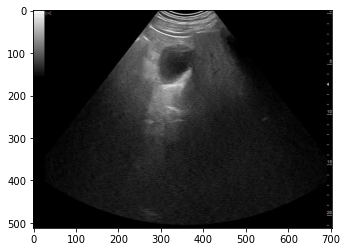

In [196]:
image5= cv2.imread(os.path.join(file_path,image5_Path))
plt.imshow(image5)


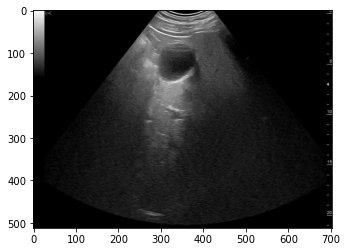

In [197]:
image6= cv2.imread(os.path.join(file_path,image6_Path))
plt.imshow(image6)


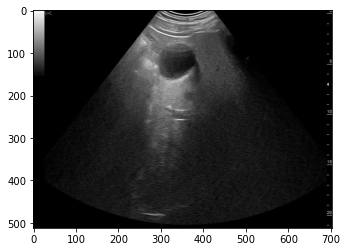

In [198]:
image7= cv2.imread(os.path.join(file_path,image7_Path))
plt.imshow(image7)

Step 2 : plot the contour points on the images

In [199]:
#Read the csv points files
points5_df = pd.read_csv(os.path.join(file_path,points5_file),sep=";")
points6_df = pd.read_csv(os.path.join(file_path,points6_file),sep=";")
points7_df = pd.read_csv(os.path.join(file_path,points7_file),sep=";")



In [200]:
#Read the centers points files 
CP5_df=pd.read_csv(os.path.join(file_path,CenterP5_file),sep=";")
CP6_df=pd.read_csv(os.path.join(file_path,CenterP6_file),sep=";")
CP7_df=pd.read_csv(os.path.join(file_path,CenterP7_file),sep=";")

In [201]:
CP5_df.head()

,X Coordinate,Y Coordinate
0,346,129


In [202]:
CP6_df.head()
CP6_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [203]:
CP7_df.head()
CP7_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [204]:
points5_df.head()


,Angle,x,y
0,0,392,129
1,2,391,130
2,4,363,130
3,6,364,130
4,8,386,134


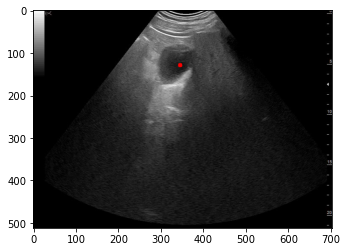

In [205]:
#plot the center point on the images 
#plot center on image 5
# Get the center coordinate.
x_center=int(CP5_df.get(['X Coordinate'][0]) )
y_center =int(CP5_df.get(['Y Coordinate'][0]))

imgpltC5=image5.copy()
imgpltC5 = cv2.circle(imgpltC5, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)
plt.imshow(imgpltC5)





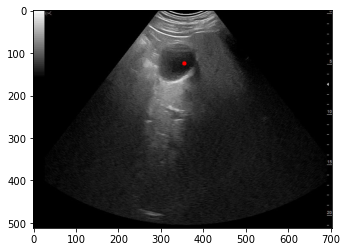

In [206]:
#plot center on image 6
# Get the center coordinate.
x_center=int(CP6_df.get(['X Coordinate'][0]) )
y_center =int(CP6_df.get(['Y Coordinate'][0]))

imgpltC6=image6.copy()
imgpltC6 = cv2.circle(imgpltC6, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)
plt.imshow(imgpltC6)

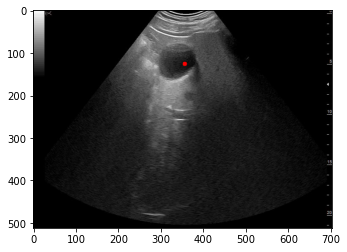

In [207]:
#plot center on image 7
# Get the center coordinate.
x_center=int(CP7_df.get(['X Coordinate'][0]) )
y_center =int(CP7_df.get(['Y Coordinate'][0]))

imgpltC7 =image7.copy()
imgpltC7 = cv2.circle(imgpltC7, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)

plt.imshow(imgpltC7)

-1

Plot initals points on the images

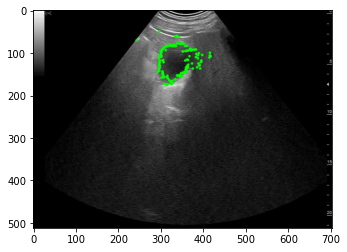

In [208]:
#Plot points for image 5
data = points5_df.values
imgplt5 = image5.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt5= cv2.circle(imgplt5, (x,y), radius=0, color=(0, 255, 0), thickness=5)


plt.imshow(imgplt5)


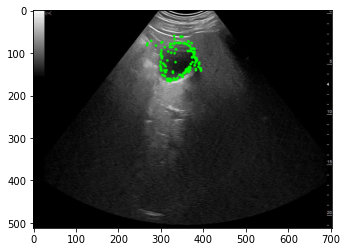

In [209]:
#Plot points for image 6
data = points6_df.values
imgplt6 = image6.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt6= cv2.circle(imgplt6, (x,y), radius=0, color=(0, 255, 0), thickness=5)


plt.imshow(imgplt6)


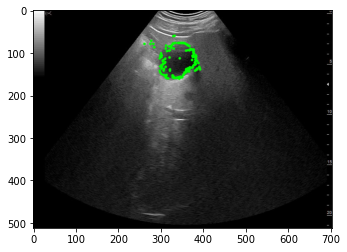

In [210]:
#Plot points for image 7
data = points7_df.values
imgplt7 = image7.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt7= cv2.circle(imgplt7, (x,y), radius=0, color=(0, 255, 0), thickness=5)


plt.imshow(imgplt7)


Dilatation function 

In [211]:
def Dilation(src,size):

    dilatation_type = cv2.MORPH_RECT
    #title_dilatation_window = 'Dilation Demo'


    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size,                  dilatation_size))

    dilatation_dst = cv2.dilate(src, element)
    return(dilatation_dst)
    


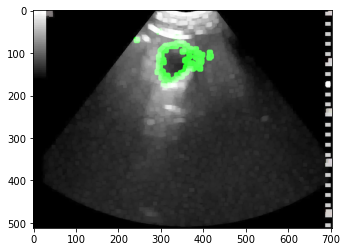

In [218]:
src =imgplt5
dilatation_size =4
dilatation_dst = Dilation(src,dilatation_size)
plt.imshow(dilatation_dst)

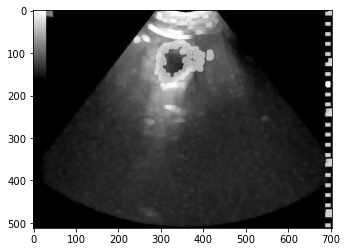

In [219]:
srcGrey=cv2.cvtColor(dilatation_dst, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(srcGrey, cv2.COLOR_BGR2RGB))


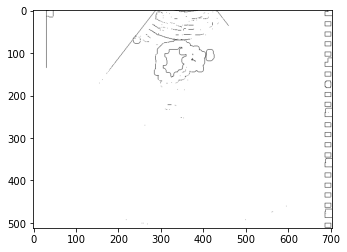

In [220]:
srcBinary = cv2.adaptiveThreshold(srcGrey,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,10)
plt.imshow(cv2.cvtColor(srcBinary, cv2.COLOR_BGR2RGB))


In [215]:
#srcBinary = cv2.adaptiveThreshold(srcGrey,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,5)
#plt.imshow(cv2.cvtColor(srcBinary, cv2.COLOR_BGR2RGB))

In [262]:
def display_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    return(labeled_img)



In [285]:
dataImages=[imgplt5,imgplt6,imgplt7]
"""
print(type(dataImages[0]))

NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

for i, image in enumerate(dataImages):
    ax_arr[i].imshow(image)
    ax_arr[i].set_title('image '+ str(i))


title = 'side by side view of images'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()
"""


"\nprint(type(dataImages[0]))\n\nNUM_ROWS = 1\nIMGs_IN_ROW = 3\n\nf, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))\n\nfor i, image in enumerate(dataImages):\n    ax_arr[i].imshow(image)\n    ax_arr[i].set_title('image '+ str(i))\n\n\ntitle = 'side by side view of images'\nf.suptitle(title, fontsize=16)\nplt.tight_layout()\nplt.show()\n"

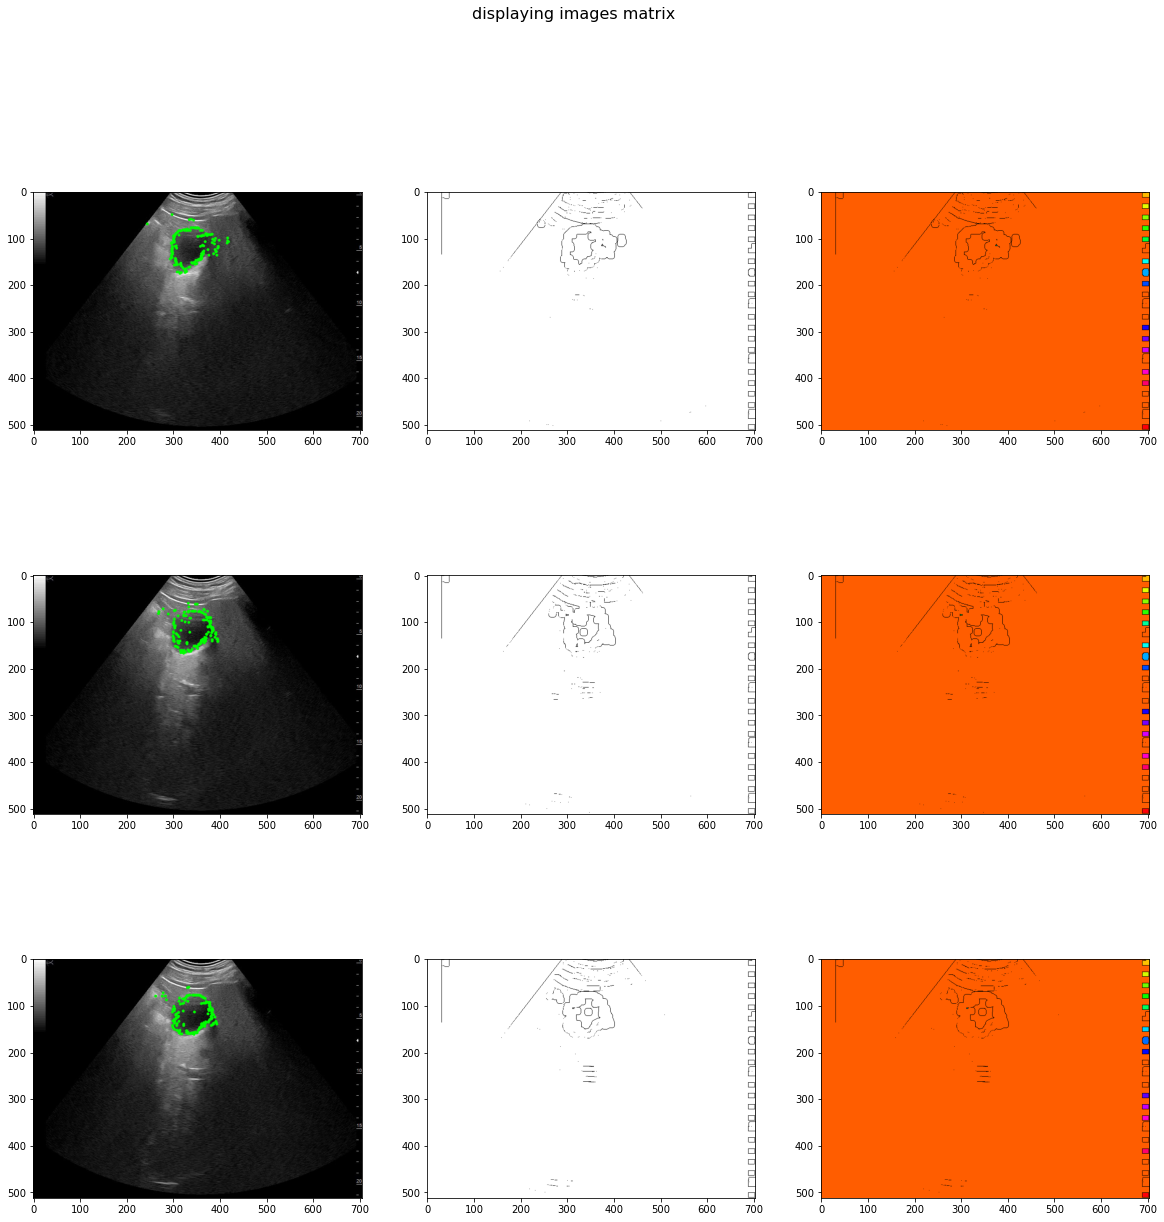

In [312]:

all_images=[]
for i, image in enumerate(dataImages):
    #do dilatation
    dilatation_dst=Dilation(image,4)
    #Convert to gray scale
    grey_image=cv2.cvtColor(dilatation_dst, cv2.COLOR_BGR2GRAY)
    #Convert to binary
    binary_image=cv2.adaptiveThreshold(grey_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,10)
    #Compute  connected components
    num_labels, labels_im = cv2.connectedComponents(binary_image,connectivity=8)
    labeled_img=display_components(labels_im)
    all_images.append(image)
    all_images.append(binary_image)
    all_images.append(labeled_img)
   

NUM_ROWS = 3
IMGs_IN_ROW = 3
f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(20,20))

for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
        ax.imshow(cv2.cvtColor(all_images[j*IMGs_IN_ROW+i], cv2.COLOR_BGR2RGB))
        ax.set_title('')

title = 'displaying images matrix'
f.suptitle(title, fontsize=16)
plt.show()  


   
    
